# Meaning of some confusing variables

### WHR : Wining % Home Regular
### WRR : Wining % Road Regular
### WHPO : Wining % Home Playoffs
### WRPO : Wining % Road Playoffs


------WHAT DO YOU WANT TO DO?------

	1 -- PREDICT A GAME RESULT
	2 -- CHECK PERFORMANCE OF TEAMS

Please make a choice (from 1 or 2)
>>> 1

------PLEASE CHOOSE A TEAM------

	1 -- Atlanta Hawks		2 -- Boston Celtics		3 -- Brooklyn Nets	
	4 -- Charlotte Hornets		5 -- Chicago Bulls		6 -- Cleveland Cavalie	
	7 -- Dallas Mavericks		8 -- Denver Nuggets		9 -- Detroit Pistons	
	10 -- Golden State Warr		11 -- Houston Rockets		12 -- Indiana Pacers	
	13 -- LA Clippers		14 -- Los Angeles Laker		15 -- Memphis Grizzlies	
	16 -- Miami Heat		17 -- Milwaukee Bucks		18 -- Minnesota Timberw	
	19 -- New Orleans Pelic		20 -- New York Knicks		21 -- Oklahoma City Thu	
	22 -- Orlando Magic		23 -- Philadelphia 76er		24 -- Phoenix Suns	
	25 -- Portland Trail Bl		26 -- Sacramento Kings		27 -- San Antonio Spurs	
	28 -- Toronto Raptors		29 -- Utah Jazz		30 -- Washington Wizard	

Please select the first team (from 1 to 30)
>>> 10

Please select the second team (from 1 to 30)
>>> 6

------WHAT IS THE HOME TEAM?---

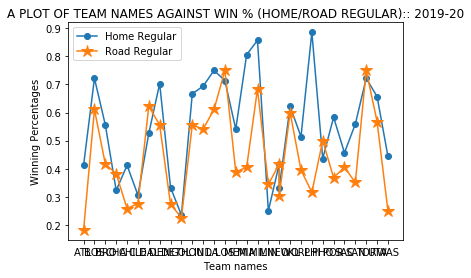

In [ ]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import sys
import matplotlib
import statistics

with open('/Users/akshitarora/Downloads/nba.csv') as csv_file:
    csv_reader = csv.reader(csv_file,)
    data_set = {}
    team_list = []
    line_count = 0
    for row in csv_reader:
        if line_count != 0:
            team_list.append(row[0])
            data_set[row[0]] = {
                "name": row[0],
                "stats": {
                    "2013-14": [row[680], row[472], row[706], row[264]],
                    "2014-15": [row[394], row[446], row[316], row[628]],
                    "2015-16": [row[238], row[290], row[186], row[498]],
                    "2016-17": [row[4], row[160], row[420], row[56]],
                    "2017-18": [row[108], row[82], row[212], row[524]],
                    "2018-19": [row[30], row[134], row[342], row[576]],
                    "2019-20": [row[602], row[550], row[654], row[368]],
                }
            }
        line_count += 1

repeat = True

while repeat:

    choice = 0
    print("\n------WHAT DO YOU WANT TO DO?------\n")
    print("\t1 -- PREDICT A GAME RESULT")
    print("\t2 -- CHECK PERFORMANCE OF TEAMS")

    while choice <= 0 or choice > 2:
        try:
            choice = int(
                input("\nPlease make a choice (from 1 or 2)\n>>> "))
        except:
            print("\nException:: You did not enter a number. Please enter a number.")
            choice = 0

# --------------------------------------------------------------------------------------------------------
    # PREDICT GAME RESULT
# --------------------------------------------------------------------------------------------------------

    if choice == 1:
        team_selected = 0
        team1 = 0
        team2 = 0
        print("\n------PLEASE CHOOSE A TEAM------\n")

        for i in range(1, len(team_list)+1):
            print(f"\t{i} -- {team_list[i-1][:17]}\t", end='')

            if(i % 3 == 0):
                print()

        while team1 <= 0 or team1 > 30:
            try:
                team1 = int(
                    input("\nPlease select the first team (from 1 to 30)\n>>> "))
            except:
                print("\nException:: You did not enter a number. Please enter a number.")
                team1 = 0

        while team2 <= 0 or team2 > 30:
            try:
                team2 = int(
                    input("\nPlease select the second team (from 1 to 30)\n>>> "))
                if (team1 == team2):
                    generated_exception = 1/0
            except ZeroDivisionError:
                print("\nException:: You can't choose the same number for both teams.")
                team2 = 0
            except:
                print("\nException:: You did not enter a number. Please enter a number.")
                team2 = 0

        # Team names
        team1 = team_list[team1 - 1]
        team2 = team_list[team2 - 1]

        home_team_int = 0
        print("\n------WHAT IS THE HOME TEAM?------\n")
        print(f"\t1 -- {team1}".upper())
        print(f"\t2 -- {team2}".upper())

        while home_team_int <= 0 or home_team_int > 2:
            try:
                home_team_int = int(
                    input(f"\nPlease select the home team (1 for {team1} or 2 for {team2})\n>>> "))
            except:
                print("\nException:: You did not enter a number. Please enter a number.")
                home_team_int = 0

        season_type = 0
        print("\n------WHAT IS THE SEASON TYPE?------\n")
        print(f"\t1 -- REGULAR")
        print(f"\t2 -- PLAYOFF")

        while season_type <= 0 or season_type > 2:
            try:
                season_type = int(
                    input(f"\nPlease select the season type (1 or 2)\n>>> "))
            except:
                print("\nException:: You did not enter a number. Please enter a number.")
                season_type = 0
        if season_type == 1:
            season_type = 'REGULAR'
        else:
            season_type = 'PLAYOFF'

        if home_team_int == 1:
            home_team_name = team1
            road_team_name = team2
            home_team_stats = data_set[team1]['stats']
            road_team_stats = data_set[team2]['stats']
        else:
            home_team_name = team2
            road_team_name = team1
            home_team_stats = data_set[team2]['stats']
            road_team_stats = data_set[team1]['stats']

        # -----------------------------
        #   REGULAR
        # -----------------------------

        if season_type == 'REGULAR':
            home_regular_win_per = []
            road_regular_win_per = []
            for _, data in home_team_stats.items():
                try:
                    percentage = float(data[0])
                except:
                    percentage = 0.0
                home_regular_win_per.append(percentage)
            # print(home_regular_win_per)
            # print(statistics.mean(home_regular_win_per))

            for _, data in road_team_stats.items():
                try:
                    percentage = float(data[1])
                except:
                    percentage = 0.0
                road_regular_win_per.append(percentage)
            # print(road_regular_win_per)
            # print(statistics.mean(road_regular_win_per))

            mean_home_regular_win_per = 0
            mean_road_regular_win_per = 0
            try:
                mean_home_regular_win_per = statistics.mean(
                    home_regular_win_per)
            except:
                mean_home_regular_win_per = 0
            try:
                mean_road_regular_win_per = statistics.mean(
                    road_regular_win_per)
            except:
                mean_road_regular_win_per = 0

            if mean_home_regular_win_per > mean_road_regular_win_per:
                print(
                    f"\n\n\"{home_team_name}\" HAS THE HIGHER PROBABILITY OF WINNIG AGAINST \"{road_team_name}\" (REGULAR)\n".upper())
            elif mean_home_regular_win_per < mean_road_regular_win_per:
                print(
                    f"\n\n\"{road_team_name}\" HAS THE HIGHER PROBABILITY OF WINNIG AGAINST \"{home_team_name}\" (REGULAR)\n".upper())
            else:
                print(
                    f"\n\n\"{road_team_name}\" AND \"{home_team_name}\" HAS EQUAL PROBABILITY OF WINNIG (REGULAR)\n".upper())

        # -----------------------------
        #   PLAYOFFS
        # -----------------------------

        if season_type == 'PLAYOFF':
            home_playoffs_win_per = []
            road_playoffs_win_per = []
            for _, data in home_team_stats.items():
                try:
                    percentage = float(data[2])
                    home_playoffs_win_per.append(percentage)
                except:
                    percentage = 0.0

            # print(home_playoffs_win_per)
            # print(statistics.mean(home_playoffs_win_per))

            for _, data in road_team_stats.items():
                try:
                    percentage = float(data[3])
                    road_playoffs_win_per.append(percentage)
                except:
                    percentage = 0.0

            # print(road_playoffs_win_per)
            # print(statistics.mean(road_playoffs_win_per))

            mean_home_playoffs_win_per = 0
            mean_road_playoffs_win_per = 0

            try:
                mean_home_playoffs_win_per = statistics.mean(
                    home_playoffs_win_per)
            except:
                mean_home_playoffs_win_per = 0
            try:
                mean_road_playoffs_win_per = statistics.mean(
                    road_playoffs_win_per)
            except:
                mean_road_playoffs_win_per = 0

            if mean_home_playoffs_win_per > mean_road_playoffs_win_per:
                print(
                    f"\n\n\"{home_team_name}\" HAS THE HIGHER PROBABILITY OF WINNIG AGAINST \"{road_team_name}\" (PLAYOFFS)\n".upper())
            elif mean_home_playoffs_win_per < mean_road_playoffs_win_per:
                print(
                    f"\n\n\"{road_team_name}\" HAS THE HIGHER PROBABILITY OF WINNIG AGAINST \"{home_team_name}\" (PLAYOFFS)\n".upper())
            else:
                print(
                    f"\n\n\"{road_team_name}\" AND \"{home_team_name}\" HAS EQUAL PROBABILITY OF WINNIG (PLAYOFFS)\n".upper())

        question = input(
            "\nDo you want to repeat the process? (YES / NO)\n>>>  ")
        question = question.lower()
        if question == 'yes' or question == 'y':
            repeat = True
        else:
            repeat = False
            print('See you soon!\n')

# --------------------------------------------------------------------------------------------------------
    # CHECK PERFORMANCE OF TEAMS
# --------------------------------------------------------------------------------------------------------
    else:

        print("\n------------OPTIONS-------------")
        print("\n\t1 -- 2013 - 2014")
        print("\t2 -- 2014 - 2015")
        print("\t3 -- 2015 - 2016")
        print("\t4 -- 2016 - 2017")
        print("\t5 -- 2017 - 2018")
        print("\t6 -- 2018 - 2019")
        print("\t7 -- 2019 - 2020")

        specific_year_int = 0
        specific_year = ''

        while specific_year_int <= 0 or specific_year_int > 7:
            try:
                specific_year_int = int(
                    input("\nPlease Enter an option (from 1 to 7)\n>>> "))
            except:
                print("\nException:: You did not enter a number. Please enter a number.")
                specific_year_int = 0

        if specific_year_int == 1:
            specific_year = '2013-14'
        elif specific_year_int == 2:
            specific_year = '2014-15'
        elif specific_year_int == 3:
            specific_year = '2015-16'
        elif specific_year_int == 4:
            specific_year = '2016-17'
        elif specific_year_int == 5:
            specific_year = '2017-18'
        elif specific_year_int == 6:
            specific_year = '2018-19'
        elif specific_year_int == 7:
            specific_year = '2019-20'
        else:
            print("\nSorry, An error occured :(\n")
            exit(1)

        print("\n-----CHOOSE A PREFERED CHART-----")
        print("\n\t1 -- LINE CHART")
        print("\t2 -- BARS CHART")

        choice_chart_int = 0

        while choice_chart_int <= 0 or choice_chart_int > 2:
            try:
                choice_chart_int = int(
                    input("\nPlease Enter an option (from 1 to 2)\n>>> "))
            except:
                print("\nException:: You did not enter a number. Please enter a number.")
                choice_chart_int = 0

        years = []
        whr = []
        wrr = []
        whpo = []
        wrpo = []

        team_short = []
        for elt in team_list:
            team_short.append(elt[:3].upper())

        for element in team_list:
            for x, y in data_set[element]['stats'].items():
                if x == specific_year:
                    whr.append(y[0])
                    wrr.append(y[1])

        xpoints = np.array(team_short)
        ypoints_whr = np.array(whr)
        ypoints_whr = [float(x) for x in ypoints_whr]
        ypoints_wrr = np.array(wrr)
        ypoints_wrr = [float(x) for x in ypoints_wrr]

        if choice_chart_int == 1:
            plt.plot(xpoints, ypoints_whr, marker='o',  label='Home Regular')
            plt.plot(xpoints, ypoints_wrr, marker='*',
                     ms=12, label='Road Regular')
            plt.legend()
            # Set the x axis label of the current axis.
            plt.xlabel('Team names')
            # Set the y axis label of the current axis.
            plt.ylabel('Winning Percentages')
            # Set a title
            plt.title(
                f"A PLOT OF TEAM NAMES AGAINST WIN % (HOME/ROAD REGULAR):: {specific_year}")
            plt.show()
        else:
            plt.bar(xpoints, ypoints_whr, width=0.5, label='Home Regular')
            plt.bar(xpoints, ypoints_wrr, width=0.2, label='Road Regular')
            plt.legend()
            # Set the x axis label of the current axis.
            plt.xlabel('Team names')
            # Set the y axis label of the current axis.
            plt.ylabel('Winning Percentages')
            # Set a title
            plt.title(
                f"BAR CHART OF TEAM NAMES AGAINST WIN % (HOME/ROAD REGULAR):: {specific_year}")
            plt.show()

        # Repeat Section
        question = input(
            "\nDo you want to repeat the process? (YES / NO)\n>>>  ")
        question = question.lower()
        if question == 'yes' or question == 'y':
            repeat = True
        else:
            repeat = False
            print('See you soon!\n')
